In [24]:
import cv2
import numpy as np
import tempfile
import os
import matplotlib.pyplot as plt

In [45]:
def basic_upscale_opencv(image_path, scale=2, temp_dir=None):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError("Image not found or invalid path")
    
    upscaled = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LANCZOS4)
    temp_path = os.path.join(temp_dir, "upscaled.jpg")
    cv2.imwrite(temp_path, upscaled)
    return temp_path

In [46]:
def basic_inpaint_opencv_auto_mask(image_path, temp_dir=None):
    damaged = cv2.imread(image_path)
    if damaged is None:
        raise FileNotFoundError("Image not found or invalid path")

    # Auto-create mask by detecting very dark pixels (likely damage)
    hsv = cv2.cvtColor(damaged, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 0, 0])
    upper = np.array([180, 255, 40])  # Adjust this range to suit your damage
    mask = cv2.inRange(hsv, lower, upper)

    # Save mask for inspection
    cv2.imwrite(os.path.join(temp_dir, "auto_mask_debug.jpg"), mask)

    restored = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_TELEA)
    temp_path = os.path.join(temp_dir, "restored.jpg")
    cv2.imwrite(temp_path, restored)
    return temp_path


In [49]:
def process_and_compare(image_path):
    with tempfile.TemporaryDirectory() as temp_dir:
        print(f"[INFO] Using temporary directory: {temp_dir}")

        # Process
        restored_path = basic_inpaint_opencv(image_path, temp_dir=temp_dir)
        upscaled_path = basic_upscale_opencv(restored_path, scale=2, temp_dir=temp_dir)

        # Load images
        original = cv2.imread(image_path)
        final = cv2.imread(upscaled_path)

        if original is None or final is None:
            raise ValueError("Image loading failed.")

        # Resize original to match final size for comparison
        resized_original = cv2.resize(original, (final.shape[1], final.shape[0]))

        # Convert to RGB for display
        original_rgb = cv2.cvtColor(resized_original, cv2.COLOR_BGR2RGB)
        final_rgb = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)

        # Plot using matplotlib
        fig, axs = plt.subplots(1, 2, figsize=(14, 7))
        axs[0].imshow(original_rgb)
        axs[0].set_title("Original (Damaged)")
        axs[0].axis("off")

        axs[1].imshow(final_rgb)
        axs[1].set_title("Restored + Upscaled")
        axs[1].axis("off")

        plt.tight_layout()
        plt.show()


[INFO] Using temporary directory: C:\Users\janit\AppData\Local\Temp\tmpm4anptpq


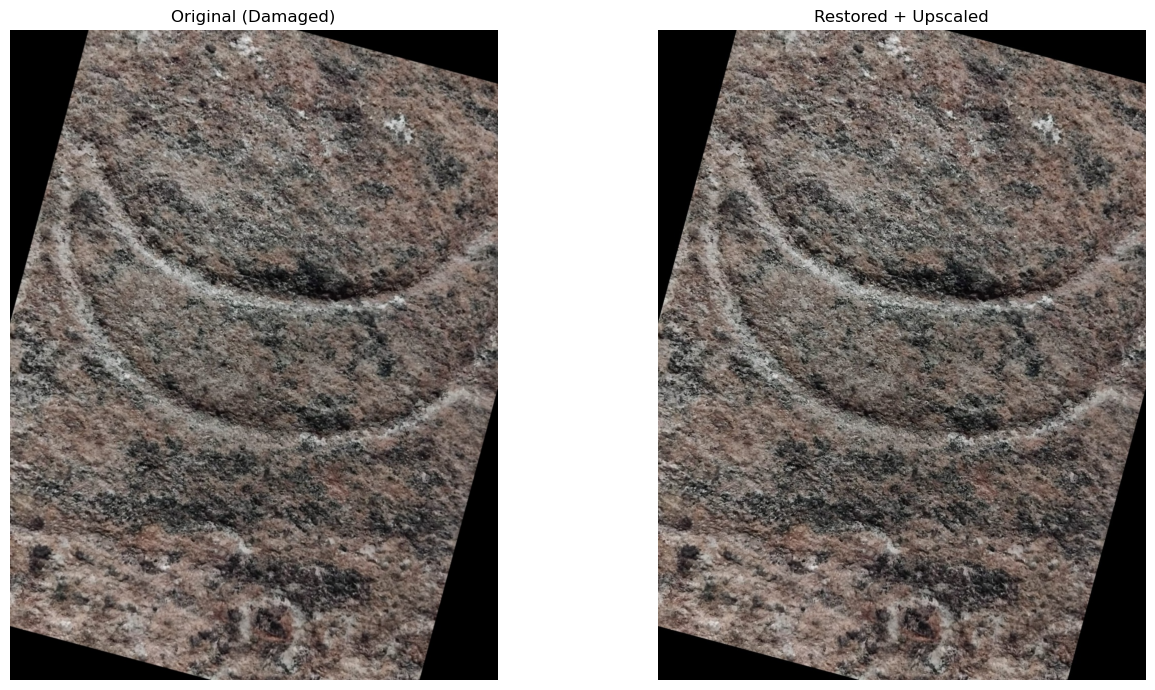

In [50]:
process_and_compare("Model_Test_Data/Moon.jpeg")